<a href="https://colab.research.google.com/github/vbanai/Reinforcement-Learning/blob/main/AB_testing_with_Thompson_Sampling_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project I am upgrading my former Webdesign A/B testing project. Now I will use Thompson sampling. I will check 9 different WEBDESIGNS: with a button in 9 different position ( BANNER 1, BANNER 2 etc.) to find out which provides the highest conversion rate. But in this project I will do the test on the fly. The metric/reward will be the click -through rate, showing how many people clicked on the banner with the button in different positions. By means of the Thompson sampling we can decide on the fly which button is more effective and produce more click through rate in the real life, saving money for the company compared to traditional A/B testing methods.

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import random

Just for testing and simulation purposes a reward matrix is to be created,  predetermined converision rates are made up to populate the matrix with fictive rewards. In case  of real life testing "on-the-fly" this matrix is NA as we get the reward when a new cusomer click on one of the testing buttons. 

In [ ]:
# Setting the parameters, N is the number of the  planned rounds
N = 10000  
d = 9   # the banners in 9 postion

# Creating the reward matrix for simulation purpose
conversion_rates = [0.05,0.13,0.09,0.16,0.11,0.04,0.20,0.08,0.01]  # it is just a fictive conversion rate to simulate the process, in real life you get the reward on the fly one someone click on the banner
X = np.array(np.zeros([N,d]))
for i in range(N):
    for j in range(d):
        if np.random.rand() <= conversion_rates[j]:
            X[i,j] = 1

Implementing a Random Strategy and Thompson Sampling
I would like to compare how much the Thompson Sampling outperform a random strategy, when we just show the 9 banners randomly.

In [ ]:

strategies_selected_rs = []
strategies_selected_ts = []
total_reward_rs = 0
total_reward_ts = 0
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
for n in range(0, N):
    # Random Strategy
    strategy_rs = random.randrange(d)
    strategies_selected_rs.append(strategy_rs)
    reward_rs = X[n, strategy_rs]
    total_reward_rs = total_reward_rs + reward_rs
    # Thompson Sampling
    strategy_ts = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)  #take a random draw from the distribution Beta
        if random_beta > max_random:
            max_random = random_beta
            strategy_ts = i
    reward_ts = X[n, strategy_ts]
    if reward_ts == 1:  
        numbers_of_rewards_1[strategy_ts] = numbers_of_rewards_1[strategy_ts] + 1  # with this we push the given (i) distrubution curve further to the right on the x axis, increase the importance of the strategy i
    else:
        numbers_of_rewards_0[strategy_ts] = numbers_of_rewards_0[strategy_ts] + 1  # with this we push the given (i) distrubution curve further to the left on the x axis, decrease the importance of the strategy i
    strategies_selected_ts.append(strategy_ts)
    total_reward_ts = total_reward_ts + reward_ts

In [ ]:
# Computing the Absolute and Relative Return
absolute_return = total_reward_ts - total_reward_rs
relative_return = (total_reward_ts - total_reward_rs) / total_reward_rs * 100
print("Absolute Return: {}".format(absolute_return))
print("Relative Return : {:.0f} % (It shows how much percentage the \"Thompson Sampling\" technique outperforms the Random Strategy)".format(relative_return))




Absolute Return: 940.0
Relative Return : 104 % (It shows how much percentage the "Thompson Sampling" technique outperforms the Random Strategy)


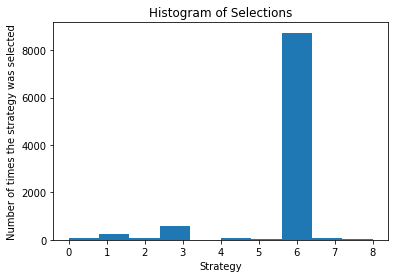

In [ ]:
# Plotting the Histogram of Selections
plt.hist(strategies_selected_ts)
plt.title('Histogram of Selections')
plt.xlabel('Strategy')
plt.ylabel('Number of times the strategy was selected')
plt.show()

In [ ]:
strategies={}
for strategy in strategies_selected_ts:
  strategies[strategy]=strategies.get(strategy,0)+1

best_strategy = max(strategies, key=strategies.get)
print("The banner which produces the highest click through rate: BANNER {}".format(best_strategy+1))

The banner which produces the highest click through rate: BANNER 7


######################  End of the project   #########################

Multi arm bandit concept</br>
</br>
Upper Confidence Bound (UCB)</br>
CTR Optimization (Click through rate) on 10 car advertisements

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv("/content/Ads_CTR_Optimisation.csv")

In [1]:


import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward


SyntaxError: ignored

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()